<a href="https://colab.research.google.com/github/JuanDa14Sa/IAM/blob/main/TSP_HillClimbing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hill Climbing-TSP

Generamos $n$ puntos dentro del círculo con centro $(0,0)$ y radio $1$:

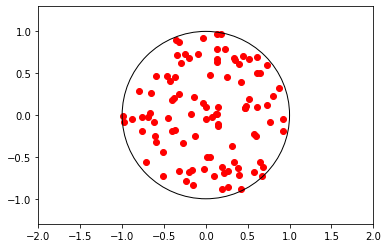

In [ ]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

random.seed(1)
np.random.seed(1)

center_x=0
center_y=0
radius_max=1
num_points=100

def point_circle(center_x,center_y,radius_max):
    theta = 2*math.pi*random.random() #Entre 0 y 2pi

    r=radius_max*math.sqrt(random.random())

    x = r * math.cos(theta) + center_x
    y = r * math.sin(theta) + center_y
    return x,y

fig,ax=plt.subplots()
circle = plt.Circle((0, 0), 1,fill=False)
ax.add_artist(circle)
ax.axis('equal')
ax.set(xlim=(-2, 2), ylim = (-2, 2))

points=[]
for i in range(num_points):
    x,y=point_circle(center_x,center_y,radius_max)
    points.append((x,y))
    ax.scatter(x,y,color='r')
    if num_points<=10:
        ax.annotate(i, (x+0.03, y+0.03))

Ahora creamos la matriz de distancias entre cada punto, asumiendo que todos están conectados.

Además definimos la función para calcular la distancia total de una ruta dada, donde una ruta es una permutación del conjunto $\{1,\dots,n-1\}$.

In [ ]:
def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)
    
matrix_dist=[[dist(points[i],points[j])for j in range(len(points))] for i in range(len(points))]

def route_len(R): 
    sum=0
    for i in range(len(R)-1):
        sum=sum+matrix_dist[R[i]][R[i+1]]
    return sum

Ahora necesitamos tomar una ruta inicial aleatoria para iniciar nuestro proceso de descenso.

Aparte de esto, definimos la función para calcular los candidatos(vecinos) del punto inicial. Esto lo realizamos alterando algunas posiciones de la ruta inicial. 

In [ ]:
def gen_route(num_points): 
    route=np.random.choice(range(num_points),replace=False,size=num_points)
    return route

def gen_candidatev1(matrix_dist, solution):
    candidates = []
    for i in range(len(solution)):
        for j in range(i + 1, len(solution)):
            candidate_ = solution.copy()
            candidate_[i] = solution[j]  
            candidate_[j] = solution[i]
            candidates.append(candidate_)
            
    candidate= candidates[random.randint(0,len(solution))]
    candidate_eval= route_len(candidate)
    return candidate, candidate_eval


Ahora realizamos el random restart Hill Climbing para obtener una solución al problema TSP.

Guardamos todas las soluciones de cada reinicio en el arreglo solutions, finalmente escogemos la distancia mínima entre todas las soluciones.

In [ ]:
def rand_hill_climbing(n_iterations,num_points):
    solution = gen_route(num_points)
    solution_eval = route_len(solution)

    for i in range(n_iterations):
            candidate,candidate_eval=gen_candidatev1(matrix_dist,solution)
            # print('f(%s) = %f' % (candidate, candidate_eval))
            if candidate_eval<=solution_eval:
                solution,solution_eval=candidate,candidate_eval
                # print('>%d f(%s) = %.5f' % (i, solution, solution_eval))
    return [solution, solution_eval]

solutions=[]

for _ in range(100):
    n_iterations = 100
    best, score = rand_hill_climbing(n_iterations,num_points)
    solutions.append((best,score))
    # print('Done!>>>>>>>')
    # print('f(%s) = %f' % (best, score))
route,val=min(solutions,key=lambda x:x[1])

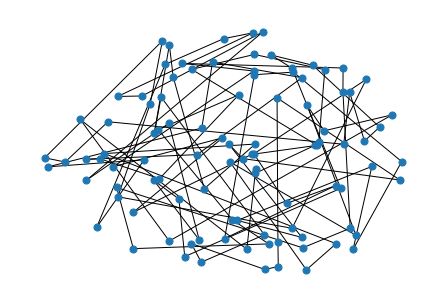

In [ ]:
import networkx as nx

G = nx.Graph()

for i in range(num_points):
    G.add_node(i,pos=points[i])
    if i==num_points-1:
        G.add_edge(route[i],route[0])
    else:
        G.add_edge(route[i],route[i+1])

nx.draw(G,nx.get_node_attributes(G, 'pos'),node_size=50)

